In [13]:
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [26]:
# dir_path = os.path.dirname(os.path.realpath(__file__))
# record_export_folder = os.path.join(record_export_folder, 'recordings')
record_export_folder = 'recordings'
# file_path = os.path.join(record_export_folder, 'test10.csv')
file_path = os.path.join(record_export_folder, 'checkerboard_no_switch.csv')

In [27]:
df = pd.read_csv(file_path, skiprows=0, header=1)

In [28]:
keep_cols = ['Timestamp', 'EEG.Counter', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8']

In [29]:
trimmed_df = df[keep_cols]

In [30]:
trimmed_df.head

<bound method NDFrame.head of          Timestamp  EEG.Counter       EEG.P7       EEG.O1       EEG.O2  \
0     1.600982e+09        121.0  4613.333496  3961.025635  3796.923096   
1     1.600982e+09        122.0  4615.384766  3962.051270  3800.512939   
2     1.600982e+09        123.0  4615.384766  3961.025635  3802.564209   
3     1.600982e+09        124.0  4619.487305  3962.564209  3808.718018   
4     1.600982e+09        125.0  4625.641113  3964.615479  3809.230713   
...            ...          ...          ...          ...          ...   
1933  1.600982e+09        119.0  4616.922852  3960.000000  3887.692383   
1934  1.600982e+09        120.0  4606.666504  3956.923096  3882.051270   
1935  1.600982e+09        121.0  4603.077148  3958.974365  3883.076904   
1936  1.600982e+09        122.0  4604.102539  3958.974365  3885.641113   
1937  1.600982e+09        123.0  4607.692383  3957.948730  3885.128174   

           EEG.P8  
0     4349.230957  
1     4353.846191  
2     4353.333496  
3

In [31]:
def plot_col_in_df(df, col):
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    plt.plot(df[col].values) 
    plt.show()

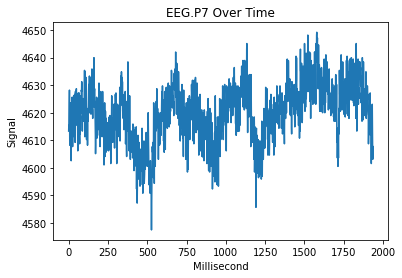

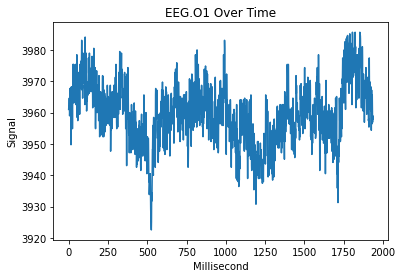

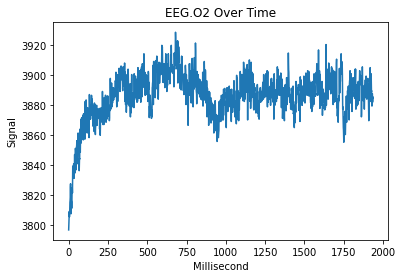

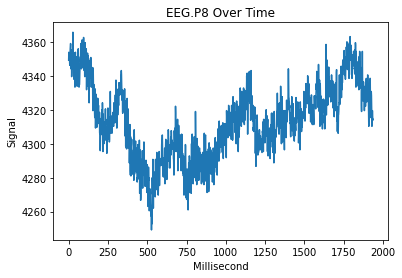

In [32]:
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df(trimmed_df, col)

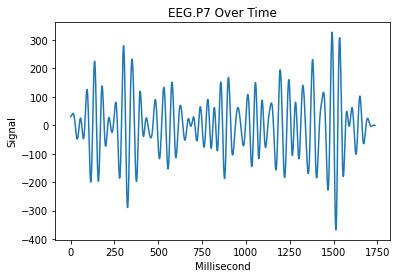

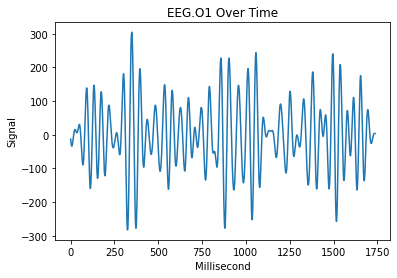

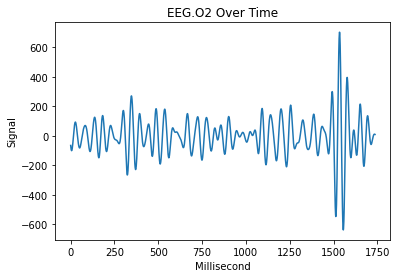

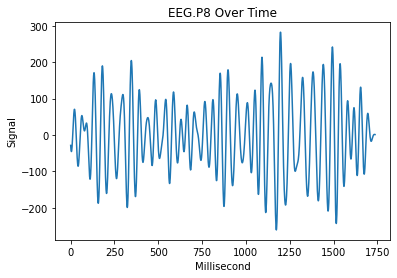

In [34]:
from scipy.signal import butter, lfilter, filtfilt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

def plot_col_in_df_filtered(df, col):
    fs = 512.0
    lowcut = 8.0
    highcut = 15.0
    
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    
    vals = df[col].values
    filtered = butter_bandpass_filter(vals, lowcut, highcut, fs)
#     filtered = new_filter(vals)
    plt.plot(filtered[200:]) 
    plt.show()

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    data = data * 50    # amplify data
#     y = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y

def new_filter(data):
    filter = signal.firwin(400, [0.01, 0.06], pass_zero=False)
    return signal.convolve(data, filter, mode='same')

# Sample rate and desired cutoff frequencies (in Hz).

# Plot the frequency response for a few different orders.
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df_filtered(trimmed_df, col)